In [1]:
### IMPORTS ###
import glob, os, datacube, xarray, bokeh, time, math, scipy
import stlabutils;   # import stlab
import numpy as np

import matplotlib.pyplot  as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.pyplot import cm
import matplotlib.image as mpimg
import matplotlib as mpl

File_path = "/home/jovyan/steelelab/measurement_data/Triton/Jasper/HBAR_transmon_flipchip/"

def load_data_4colorplot(file_name = "HBARtr_STARK_1_2023_01_21_23.46.25_Fix3_pw_spec"):
    file_pre = File_path+file_name+'/'+file_name+'.dat';    file = stlabutils.readdata.readdat(file_pre,delim=',')
    
    #Extract once:
    Freq=file[0]['Frequency (Hz)'].values;    f_stark=file[0][' Stark freq [Hz]'].values[0];
    #
    S21Real=[]; S21Imag=[]; S21dB=[]; S21Ph=[]; p_stark=[];
    
    for i in np.arange(len(file)):
        #EXTRACT DATA:
        #VNA data:
        S21Real.append(file[i][' CH2_S21_S1re ()'].values)
        S21Imag.append(file[i][' CH2_S21_S1im ()'].values)     
        # S21 = S21Real + 1j*S21Imag
        S21dB.append(file[i][' CH2_S21_S1dB (dB)'].values) 
        S21Ph.append(file[i][' CH2_S21_S1Ph (rad)'].values)  

        #Stark settings:
        p_stark.append(file[i][' Stark power [dBm]'].values[0])
    
    return Freq,S21Real,S21Imag,S21dB,S21Ph,f_stark,p_stark

### RC params ####
# plt.rc('font', size=8)          # controls default text sizes
# plt.rc('axes', labelsize=8)    # axis labels
# plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
# plt.rc('legend', fontsize=6)    # legend fontsize
### RC params ####
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', labelsize=10)    # axis labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

# rc params linecuts
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.linestyle'] = ':'
plt.rcParams['lines.markersize'] = 1

# rc params colorplots:


# rc params general plotting:
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['savefig.format'] = 'pdf'#'png'#'jpg'

/opt/lib/stlabutils/stlabdict.py:908: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if func is '':


In [2]:
new_stark_POWS = [-22.,-21.5, -21.,  -20.5, -20.,  -19.5, -19.,  -18.5, -18., -17.5, -17., -16.5,
                  -16., -15.5, -15.,  -14.5, -14.,  -13.5, -13.,  -12.5, -12., -11.5 -11.,-10.5,
                  -10., -9.5, -9., -8.5, -8., -7.5, -7.,-6.5, -6., -5.5, -5., -4.5, -4., -3.5, -3.,-2.5,-2. ]

for iii,kkk in enumerate([28,25,20,13,0]):
    print(new_stark_POWS[kkk])


-7.5
-9.0
-12.0
-15.5
-22.0


['Frequency (Hz)', ' CH2_S21_S1re ()', ' CH2_S21_S1im ()', ' CH2_S21_S1dB (dB)', ' CH2_S21_S1Ph (rad)', ' Probe Power (dBm)', ' Drive Power (dBm)', ' VNA Port 1 RT Attn (dB)', ' VNA Port 2 RT Attn (dB)', ' Line inside fridge Attn (dB)', ' Number Miteqs', ' Stark freq [Hz]', ' Stark power [dBm]']


<Figure size 3750x2500 with 0 Axes>

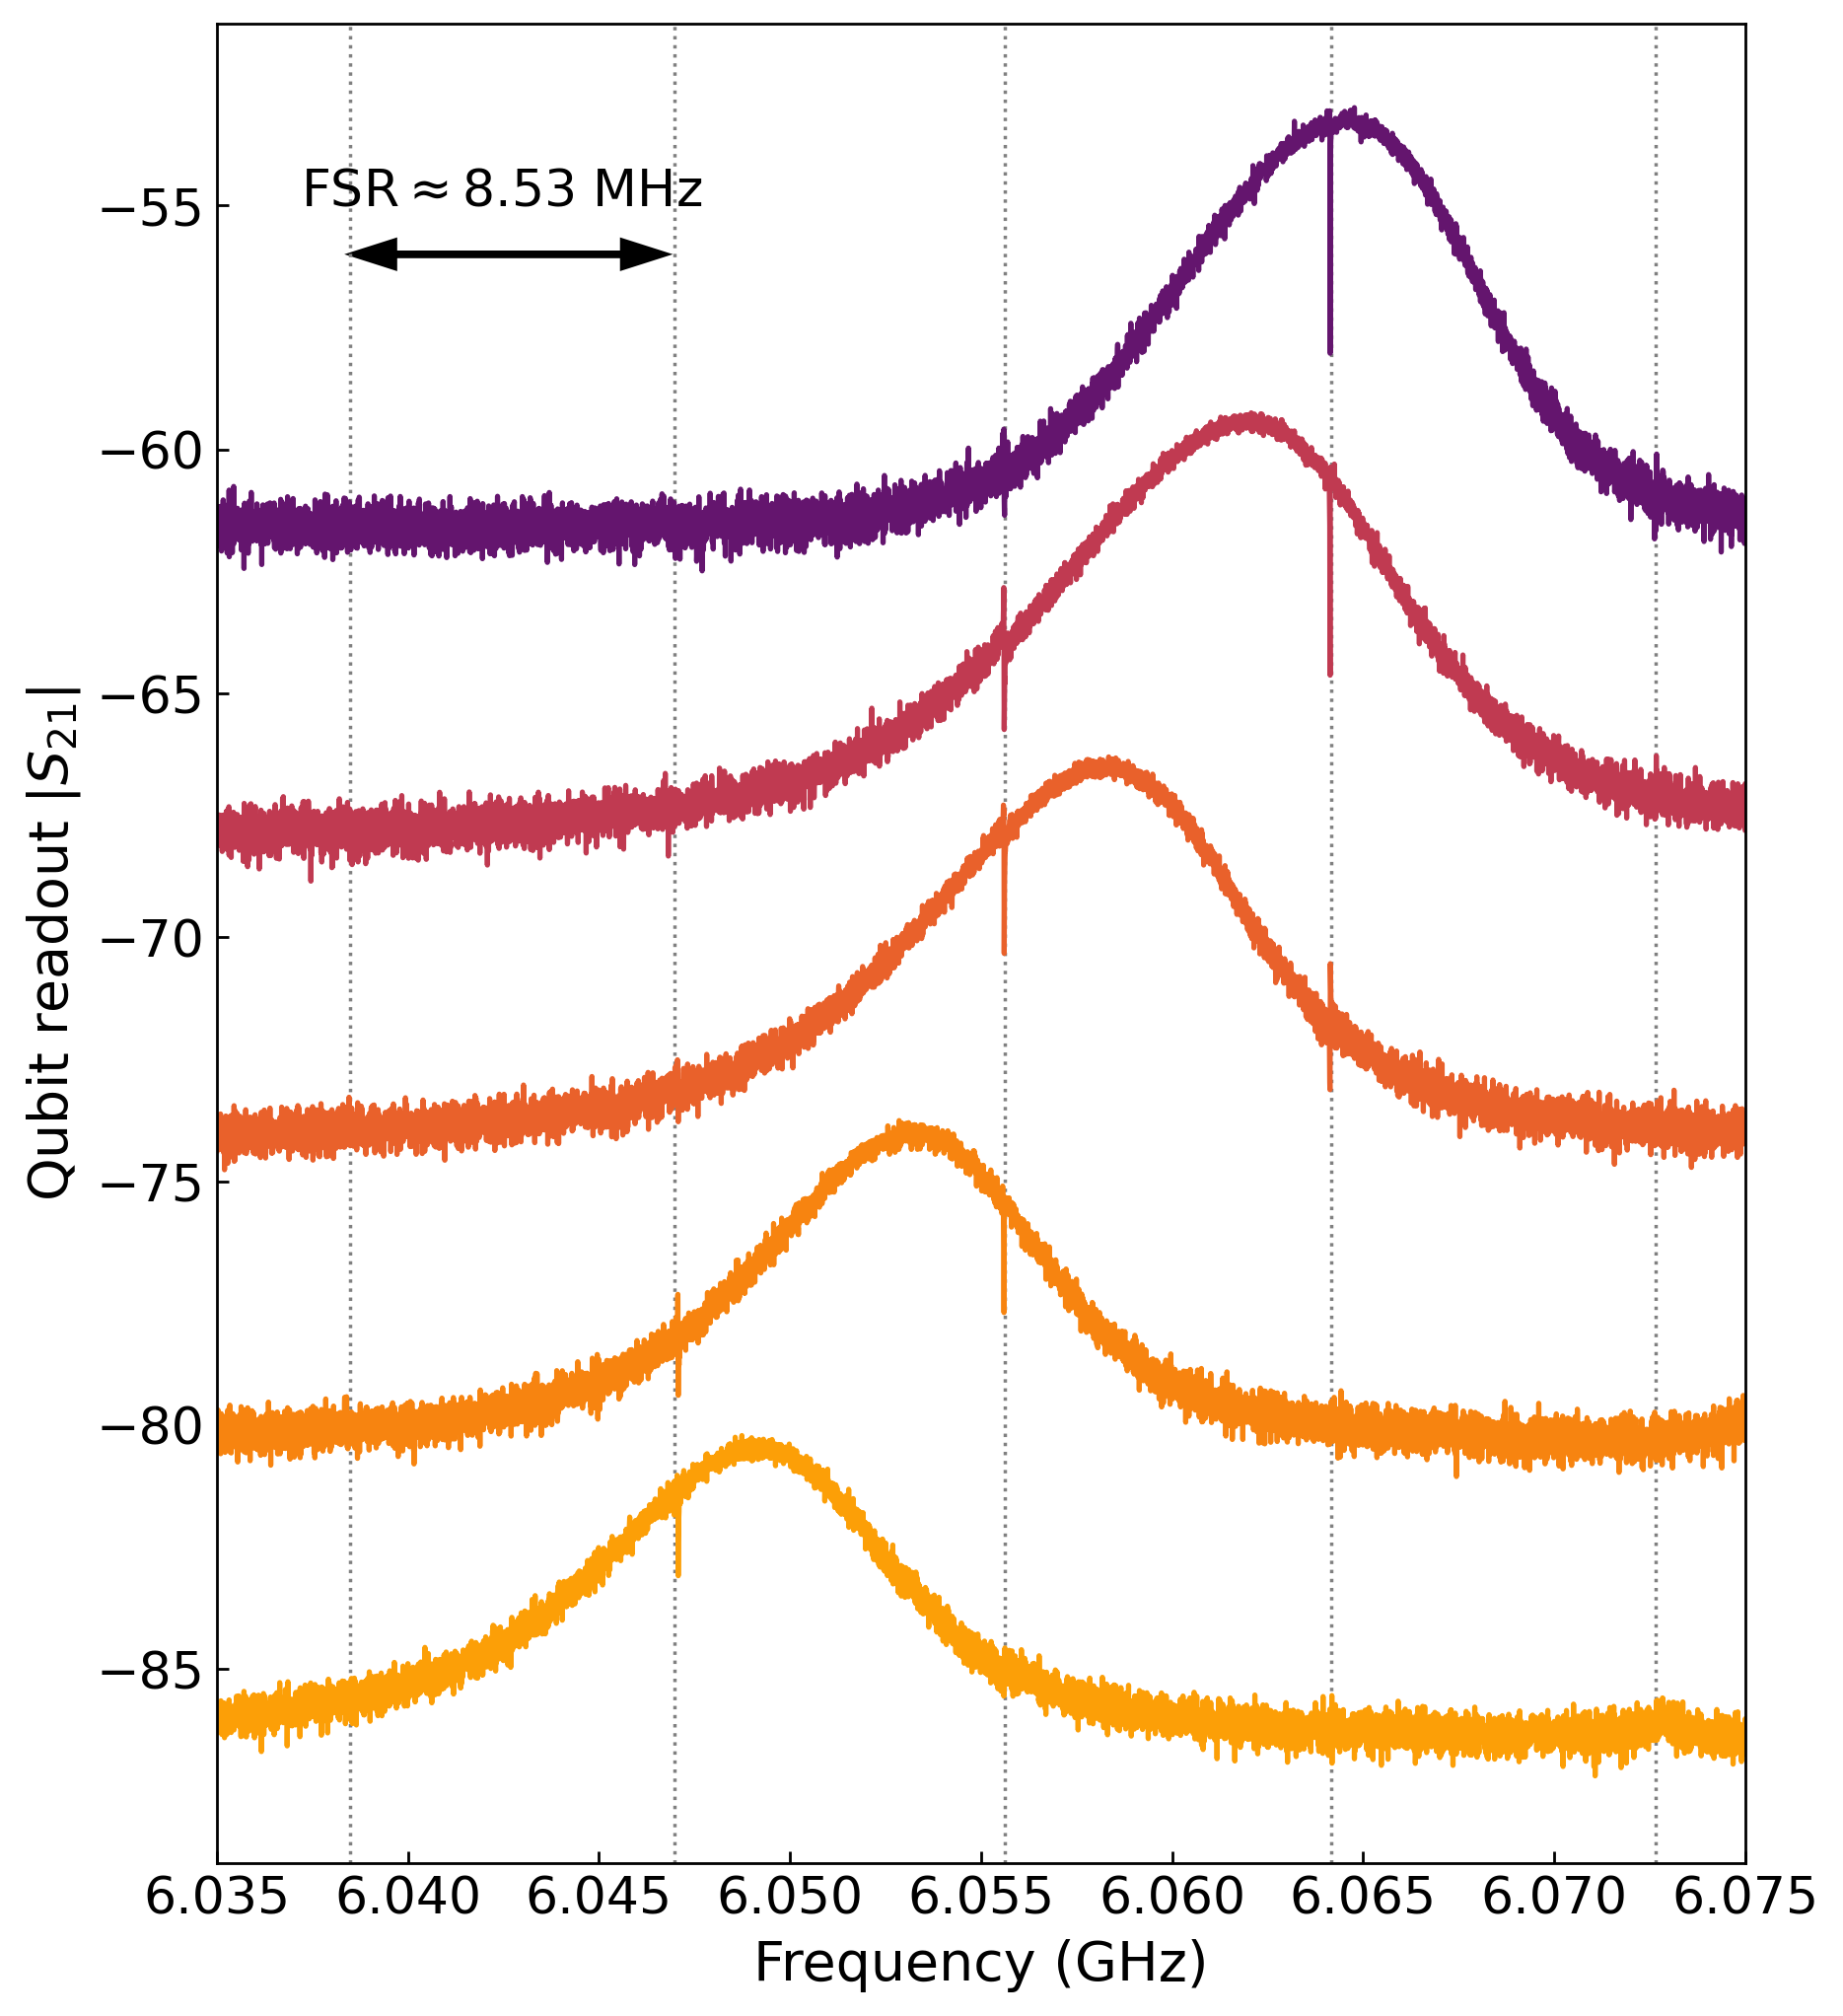

In [5]:
### OVERALL FIGURE SETTINGS & LOAD DATA:
##load Data:
Freq,S21Real,S21Imag,S21dB,S21Ph,f_stark,p_stark=load_data_4colorplot(file_name="STARK_Qdrive_Pswp1_2023_08_22_14.46.01_Flux1_pw_spec")

##settings:
fig = plt.figure(figsize=(15, 10))
fig, ax1 = plt.subplots(1, 1, figsize=(8, 10))
color_name = 'inferno';         color_name2 = color_name

fntsize = 15;            fntsize_text = 16

##chosen HBARs and Stark powers
HBAR_freqs = [5.98756, 5.97907, 5.97051, 5.96188, 5.95339]
col_numbers = [28,25,20,13,0]       # Stark powers: -22.0,-15.5,-12.0,-9.0,-7.5
# ----------------------------------------------------- figure  --------------------------------------------------
shifter = [6.5,6.5,6.5,6.5,6.5]

c1 = -30; c2 = -2
# colormap
colors = np.linspace(c1, c2, 100);        cmap = plt.get_cmap(color_name, 100) 

#star figure + add HBAR vertical lines:
for j,i in enumerate(HBAR_freqs):
    ax1.axvline(x=i+0.0851, ymin=0.00, ymax=1, color='grey', ls=':', lw=1.0)

for i,nr in enumerate(col_numbers):
    ##load DATA
    if i !=0:
        shift = set_min - max(S21dB[col_numbers[i-1]])
        shift_add += shifter[i]
    elif i==0:
        shift_add = 0
        
    #plot data:
    ax1.plot(Freq/1e9,(S21dB[nr]+shift_add),
             '-', lw=1.5 ,label='Stark power '+str(p_stark[i]), 
             c=cmap((np.abs(np.asarray(colors) - p_stark[nr])).argmin()))
    set_min = min(S21dB[col_numbers[i]])
    
### Final plot settings ###
ax1.set_ylabel(r'Qubit readout $|S_{21}|$', fontsize=fntsize_text)#, weight='bold')
ax1.set_xlabel('Frequency (GHz)', fontsize=fntsize_text)#, weight='bold')
ax1.set_xlim([6.035,6.075]); #ax1.set_ylim([-83,-50])
ax1.tick_params(axis="y",direction="in"); ax1.tick_params(axis="x",direction="in")

# creating ScalarMappable
set_vmin=c1; set_vmax = c2
sm = plt.cm.ScalarMappable(cmap=cmap, norm = mpl.colors.Normalize(vmin=p_stark[0], vmax=p_stark[-1]))
sm.set_array([])
cax = make_axes_locatable(ax1).new_vertical(size = '1.9%', pad = 0.1)
ax1.xaxis.set_tick_params(labelsize=fntsize); ax1.yaxis.set_tick_params(labelsize=fntsize)

#add an arrow + text:
plt.arrow(5.95339+0.086, -56, 0.00725, 0, head_width=0.5, head_length=0.001, linewidth=2, color='k', length_includes_head=True)
plt.arrow(5.96188+0.084, -56, -0.00725, 0, head_width=0.5, head_length=0.001, linewidth=2, color='k', length_includes_head=True)
plt.text(x=5.952+0.0852, y=-55, s=r'FSR$\approx$8.53 MHz', fontsize=fntsize, color='black')


## Save data:
# plt.savefig('AIT_MF_fig2',bbox_inches = 'tight')

plt.show()

In [4]:
f_stark

6096050000.0